In [3]:
import numpy as np
import cv2, math, random
from IPython.display import Image

In [4]:
# Loading a square image
img = cv2.imread("images/test_image2.png")  # Reading the image in BGR format
img.shape
# 216x216 dimension | 3 (RGB) Channels

(216, 384, 3)

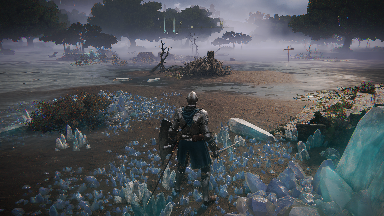

In [5]:
# Displaying image using IPython display
Image("images/test_image2.png")

In [6]:
# important constants

HEIGHT, WIDTH = img.shape[:2]
CHANNELS = 3
IMG_CENTRE_X = WIDTH//2
IMG_CENTRE_Y = HEIGHT//2
IMG_DIAG = int(math.sqrt(HEIGHT**2 + WIDTH**2))
NEW_IMAGE_CENTRE = IMG_DIAG//2

In [16]:
TransformationMatrix = lambda x : np.array([math.cos(x), -math.sin(x), math.sin(x), math.cos(x)]).reshape(2, 2)
# creating two lambda functions that return a 2x2 matrix that will be used for rotation for any given input angle x, for clockwise and anticlockwise respectively

Rotated image by : 10.906503224604212 degrees


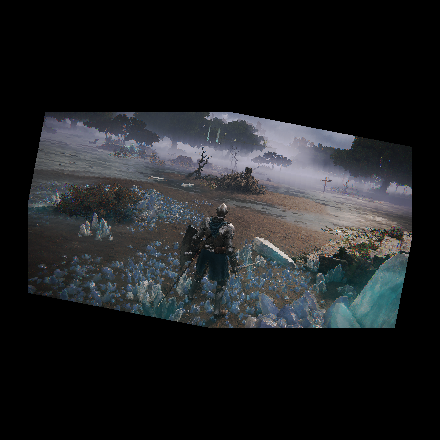

In [22]:
angleRotRadian = random.uniform(0, 270 * math.pi/180) # choose a random rotation angle b/w 0 & 270 degrees (converted to radian)
# angleRotRadian =  (720) * math.pi/180
rotated_img = np.zeros((IMG_DIAG, IMG_DIAG, 3))


for row_ind, row in enumerate(img):
    for col_ind, col in enumerate(row):
        new_indices = np.matmul(TransformationMatrix(angleRotRadian), np.array([row_ind - IMG_CENTRE_Y, col_ind - IMG_CENTRE_X]).reshape(2, 1))
        new_hi = round((float(new_indices[0])) + IMG_CENTRE_Y)
        new_wid = round((float(new_indices[1])) + IMG_CENTRE_X)

        if (new_wid >= 0 and new_hi >= 0) and (new_wid < WIDTH and new_hi < HEIGHT):
            # print(row_ind+NEW_IMAGE_CENTRE, col_ind+NEW_IMAGE_CENTRE, new_wid, new_hi)
            rotated_img[NEW_IMAGE_CENTRE + (row_ind-IMG_CENTRE_Y), NEW_IMAGE_CENTRE + (col_ind-IMG_CENTRE_X)][:] = img[new_hi, new_wid][:]

cv2.imwrite("images/rotated.png", rotated_img)
print(f"Rotated image by : {math.degrees(angleRotRadian)} degrees")
Image("images/rotated.png")